# Problem Statement
##### Lithion power is the largest producer of electric vehicle batteries.They provide batteries to rent to e-vehicle drivers.
##### Drivers rent a battery typically for a day and thereafter replacing it witha charged battery from the company.
##### Lithion power has a variable pricing model based on the driver's driving history. Battery life depends on factors such as over speeding, distance driven per day.
#### You are supposed to create a cluster model where drivers can be grouped together based on the driving data and group the datapoints so that 
##### drivers will be incentivized based on the cluster

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the dataset
df=pd.read_csv("driver-data.csv")
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
# extracting info from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


#### From the above we can see that no null values are present

In [4]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [5]:
# dropping the id column
df_analyze=df.drop("id",axis=1)

In [6]:
# initializing the model
kmeans=KMeans(n_clusters=2)

In [7]:
# fitting the model on our dataset
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

In [8]:
# using the command "cluster_centers_" to obtaining the center vectors
kmeans.cluster_centers_

array([[180.017075  ,  18.29      ],
       [ 50.04763438,   8.82875   ]])

In [9]:
# Obtaining the number of unique drivers present in the first and second cluster
unique,counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{0: 800, 1: 3200}


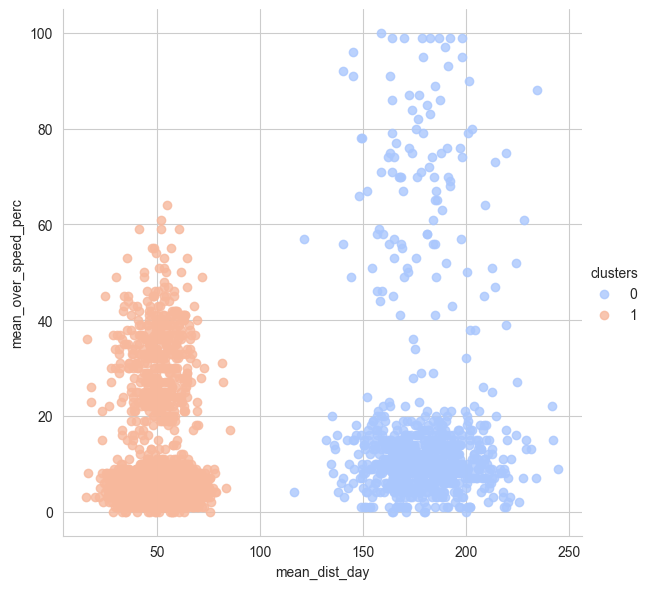

In [10]:
# visualizing the clusters
df_analyze["clusters"] = kmeans.labels_
sns.set_style("whitegrid")
sns.lmplot(x="mean_dist_day", y="mean_over_speed_perc", data=df_analyze,
           hue="clusters", palette="coolwarm", height=6, aspect=1, fit_reg=False)


In [11]:
# we will iterate over the clustering technique to optimize results 
kmeans_4=KMeans(n_clusters=4)
kmeans_4.fit(df.drop("id",axis=1))
kmeans_4.fit(df.drop("id",axis=1))
print(kmeans_4.cluster_centers_)
unique,counts=np.unique(kmeans_4.labels_,return_counts=True)


print(dict(zip(unique,counts)))

[[ 49.99263253   5.20447169]
 [180.34311782  10.52011494]
 [ 50.40482436  32.36533958]
 [177.83509615  70.28846154]]
{0: 2773, 1: 696, 2: 427, 3: 104}


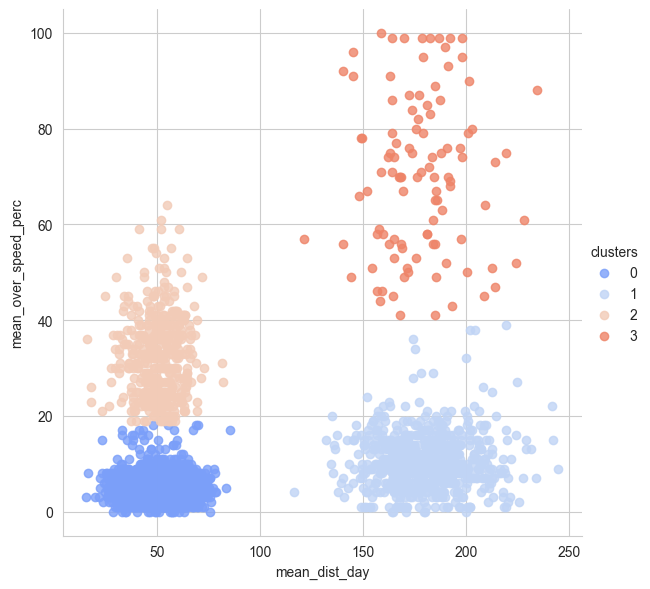

In [12]:
df_analyze["clusters"] = kmeans_4.labels_
sns.set_style("whitegrid")
sns.lmplot(x="mean_dist_day", y="mean_over_speed_perc", data=df_analyze,
           hue="clusters", palette="coolwarm", height=6, aspect=1, fit_reg=False)


#### Measuring the accuracy of the cluster using silhoutte_scores

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


cluster_labels = kmeans_4.labels_


silhouette_avg = silhouette_score(df_analyze, cluster_labels)

print(f"Silhouette Score for 4 clusters: {silhouette_avg}")


Silhouette Score for 4 clusters: 0.5916278221500535


In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


cluster_labels = kmeans.labels_

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_analyze, cluster_labels)

print(f"Silhouette Score for 2 clusters: {silhouette_avg}")


Silhouette Score for 2 clusters: 0.8489184268661805


#### based on the results we have an approximate value 0f 0.85 for picking two clusters 
#### based on the results we have an approximate value 0f 0.6 for picking four clusters
#### Therefore a silhouette score of 0.85 for 2 clusters suggests that the data points are well-separated into two distinct clusters

### Author : Tanimowo Possible